# Importing Libraries

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from matplotlib import pyplot as plt

In [75]:
df = pd.read_csv('ADBL_main.csv')
df.head()

,Symbol,High,Low,Close,Date
0,ADBL,499.0,488.0,492.0,01_01_2022
1,ADBL,412.0,400.1,411.0,01_02_2022
2,ADBL,418.0,412.0,415.0,01_03_2022
3,ADBL,424.0,410.0,422.0,01_04_2022
4,ADBL,430.0,418.0,419.0,01_05_2022


In [76]:
closedf = df.reset_index()['Close']

# Dropping Null values from data

In [77]:
closedf = closedf.dropna()
closedf

0      492.0
1      411.0
2      415.0
3      422.0
4      419.0
       ...  
250    314.0
251    314.0
252    305.1
253    307.0
254    305.0
Name: Close, Length: 255, dtype: float64

In [78]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(closedf).reshape(-1,1))
df1

array([[7.67967146e-01],
       [4.35318275e-01],
       [4.51745380e-01],
       [4.80492813e-01],
       [4.68172485e-01],
       [4.76386037e-01],
       [4.76386037e-01],
       [4.76386037e-01],
       [5.17453799e-01],
       [5.09240246e-01],
       [5.08829569e-01],
       [4.88706366e-01],
       [5.00616016e-01],
       [5.00616016e-01],
       [5.00616016e-01],
       [5.33880903e-01],
       [5.58521561e-01],
       [5.54414784e-01],
       [5.25667351e-01],
       [5.25667351e-01],
       [5.25667351e-01],
       [5.25667351e-01],
       [5.14168378e-01],
       [4.80492813e-01],
       [4.71868583e-01],
       [4.57494867e-01],
       [4.59958932e-01],
       [4.59958932e-01],
       [4.59958932e-01],
       [4.91581109e-01],
       [4.80492813e-01],
       [4.84599589e-01],
       [4.84599589e-01],
       [4.74743326e-01],
       [4.74743326e-01],
       [4.74743326e-01],
       [4.64065708e-01],
       [4.59958932e-01],
       [4.59958932e-01],
       [4.53798768e-01],


# Splitting dataset into train and test split

In [79]:
split_ratio = 0.7
train_size=int(len(df1)*split_ratio)
test_size=len(df1)-train_size
train_data, test_data = df1[0:train_size,:], df1[train_size:len(df1),:]

# Convert the data into a sequence of past time steps and future time steps

In [80]:
def create_dataset(data, time_steps=1):
    x, y = [], []
    for i in range(len(data) - time_steps - 1):
        a = data[i:(i + time_steps), 0]
        x.append(a)
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

# Create Dataset

In [81]:
time_steps = 60
x_train, y_train = create_dataset(train_data, time_steps)
x_test, y_test = create_dataset(test_data, time_steps)

# Reshape the data for the LSTM model

In [82]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# Build the LSTM model

In [83]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(1,time_steps)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 128)            96768     
                                                                 
 lstm_13 (LSTM)              (None, 1, 128)            131584    
                                                                 
 lstm_14 (LSTM)              (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 360,065
Trainable params: 360,065
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [84]:
history1 = model.fit(x_train, y_train, epochs=100, verbose=1, validation_data=(x_test, y_test))
history1

Epoch 1/100
4/4 [==============================] - 5s 292ms/step - loss: 0.0698 - accuracy: 0.0085 - val_loss: 0.2021 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0632 - accuracy: 0.0085 - val_loss: 0.1925 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0523 - accuracy: 0.0085 - val_loss: 0.1769 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0338 - accuracy: 0.0085 - val_loss: 0.1518 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0192 - accuracy: 0.0085 - val_loss: 0.1181 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0217 - accuracy: 0.0085 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0208 - accuracy: 0.0085 - val_loss: 0.1055 - val_accuracy: 0.

In [85]:
# Test the model
prediction_test = model.predict(x_test)
prediction_test = scaler.inverse_transform(prediction_test)

1/1 [==============================] - 1s 801ms/step


# Calculate Accuracy

In [86]:
#calculate accuracy
print('Accuracy: %.2f' % (model.evaluate(x_train, y_train)[1]*100))

4/4 [==============================] - 0s 2ms/step - loss: 7.0576e-04 - accuracy: 0.0085
Accuracy: 0.85


# Calculate the root mean squared error

In [87]:
y_inverse = scaler.inverse_transform(y_test.reshape(-1,1))
rmse_test = np.sqrt(np.mean(((prediction_test - y_inverse) ** 2)))
print('RMSE:', rmse_test)

RMSE: 13.142611148790948


# Plotting Model

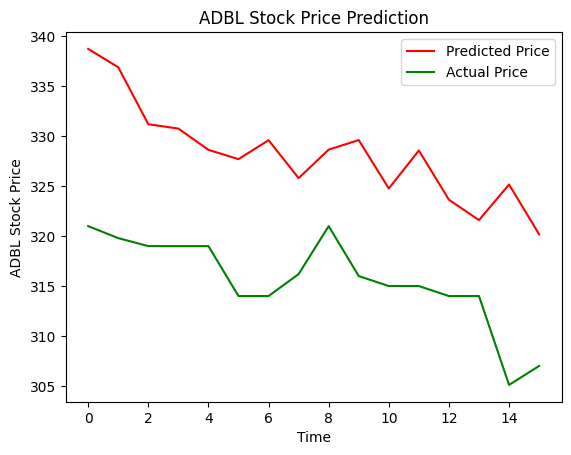

In [88]:
plt.plot(prediction_test, color='red', label='Predicted Price')
actual_price = scaler.inverse_transform(y_test.reshape(-1,1))   
plt.plot(actual_price, color='green', label='Actual Price')
plt.title('ADBL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ADBL Stock Price')
plt.legend()
plt.show()


# Checking loss in model

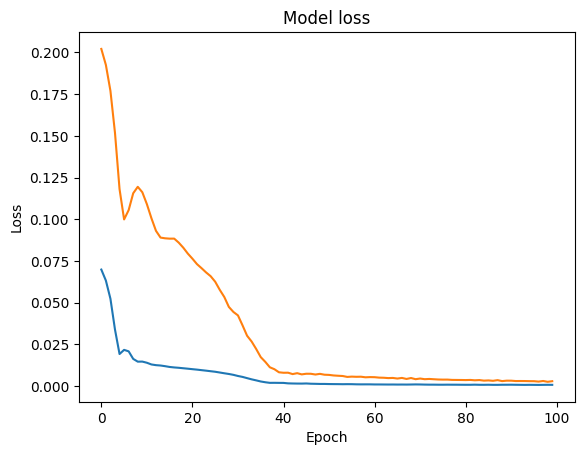

In [89]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()